In [1]:
!pip install numpy pandas scikit-learn matplotlib


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt


In [3]:
import pandas as pd

# Load your data
data = pd.read_excel('C:/Users/Prachi/Documents/Data Science Masters/Thesis/student_score_per_topic_with_total.xlsx')


In [4]:
# Convert all score columns to numeric (assuming score columns are named 'Score1', 'Score2', ...)
score_columns = [col for col in data.columns if 'sums' in col]
data[score_columns] = data[score_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values with the mean (or zero, or median)
data[score_columns] = data[score_columns].fillna(data[score_columns].mean())


In [6]:
# Create a binary 'Pass' column based on the passing percentage, e.g., 40%
passing_score = 34
data['Pass'] = (data['total'] >= passing_score).astype(int)
print(data)


     sums_1  sums_2  sums_3  sums_4  sums_5  sums_6  sums_7  total  \
0       1.5     5.5     0.0     5.0     2.0     4.5     2.0   20.5   
1       0.0     2.0     2.0     0.5     0.0     0.0     0.0    4.5   
2       0.0     6.5     4.0     3.0     5.0     5.0     3.5   27.0   
3       0.0     9.0     5.0     7.0     7.0     2.5     8.0   38.5   
4       2.5     8.0     5.0    11.5     4.0     7.0     7.5   45.5   
..      ...     ...     ...     ...     ...     ...     ...    ...   
443     2.5    13.5     5.0     9.0    12.5     8.5     1.5   52.5   
444     3.0    11.0     5.0     5.5     0.0     5.0     7.0   36.5   
445     1.0    13.0     5.0     9.0     6.5    10.0     5.5   50.0   
446     5.0    17.5     3.0     4.5    11.0     8.0     4.5   53.5   
447     5.0    18.0     5.0    11.0    12.7     9.5     7.5   68.7   

     total_percentage  Pass  
0           24.117647     0  
1            5.294118     0  
2           31.764706     0  
3           45.294118     1  
4        

In [7]:
# Assuming 'data' is your DataFrame and already loaded with the relevant features and target

# Features (using all 'sums' columns as predictors)
X = data[['sums_1', 'sums_2', 'sums_3', 'sums_4', 'sums_5', 'sums_6', 'sums_7']]

# Target (Pass/Fail column)
y = data['Pass']

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
# Predict on the testing set
predictions = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy: 0.9222222222222223
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.93      0.91      0.92        44

    accuracy                           0.92        90
   macro avg       0.92      0.92      0.92        90
weighted avg       0.92      0.92      0.92        90



In [10]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Fail', 'Pass'], rounded=True, fontsize=12)
plt.show()


InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['sums_1', 'sums_2', 'sums_3', 'sums_4', 'sums_5', 'sums_6', 'sums_7'], dtype='object') instead.

<Figure size 2000x1000 with 0 Axes>

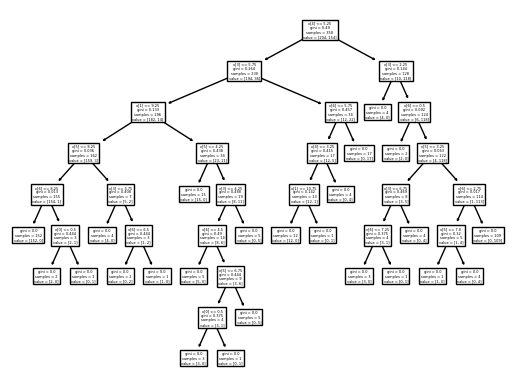

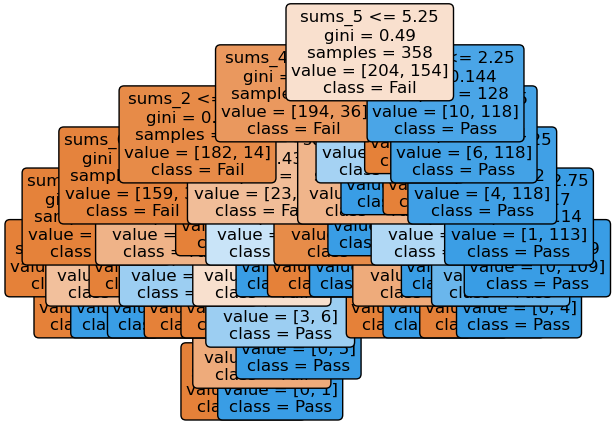

In [12]:
from sklearn import tree
import matplotlib.pyplot as plt

# Basic plot to check functionality
tree.plot_tree(clf)
plt.show()

# Gradually add parameters
tree.plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['Fail', 'Pass'], rounded=True, fontsize=12)
plt.show()
